In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
df = pd.read_csv (r'D:\school\Semesters\Fall_2021\Mech_490\Data_Analysis\Raw_data\Dummy_test3_100bpm\Raw Data.csv')

In [3]:
df_1=df.copy()
df_cname='Linear Acceleration z (m/s^2)'
df_1=df_1.iloc[:,[0,3]]
df_1

,Time (s),Linear Acceleration z (m/s^2)
0,0.105185,-0.951100
1,0.110412,-0.792633
2,0.115638,-0.621725
3,0.120865,-0.558914
4,0.126091,-0.514235
...,...,...
6807,34.988141,0.313409
6808,34.993265,0.195917
6809,34.998389,-0.041376
6810,35.003513,-0.365469


In [4]:
df_1=pd.concat([df_1['Time (s)'],df_1[f'{df_cname}']],axis=1)
df_1.set_index('Time (s)', inplace=True)


In [5]:
df_1.max()

Linear Acceleration z (m/s^2)    51.278332
dtype: float64

In [6]:
sns.set_theme(style='whitegrid')

<AxesSubplot:xlabel='Time (s)'>

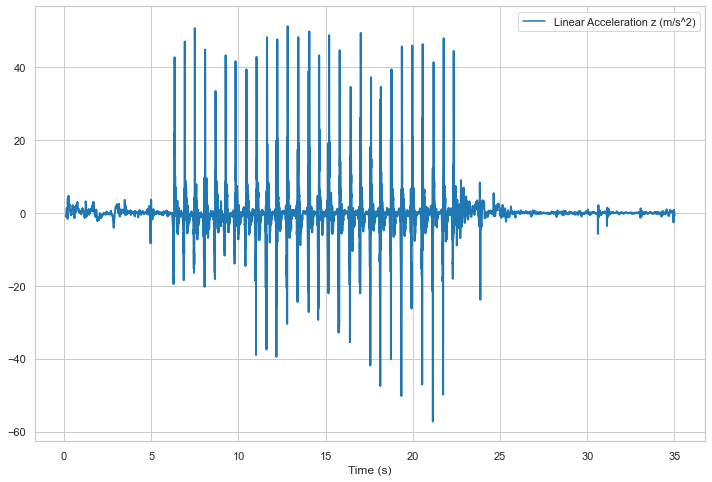

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax,data=df_1,palette='tab10',linewidth=2.0)

In [8]:
df_1=df_1.loc[6.5:10]
df_1
df_fft=df_1

<AxesSubplot:xlabel='Time (s)'>

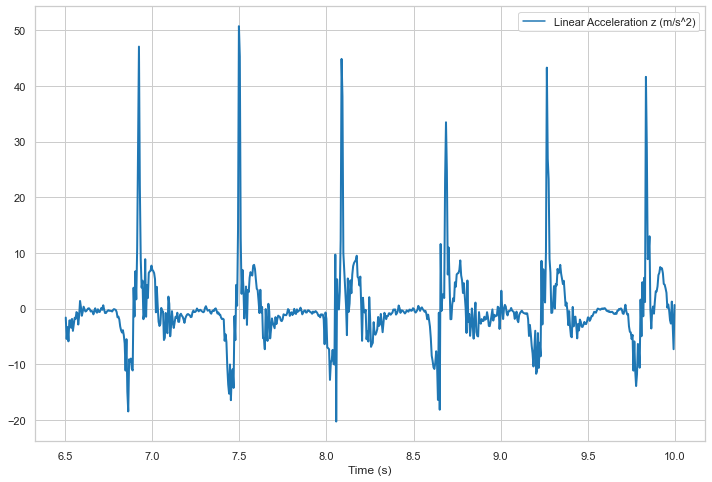

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax,data=df_1,palette='tab10',linewidth=2.0)

<AxesSubplot:xlabel='Time (s)'>

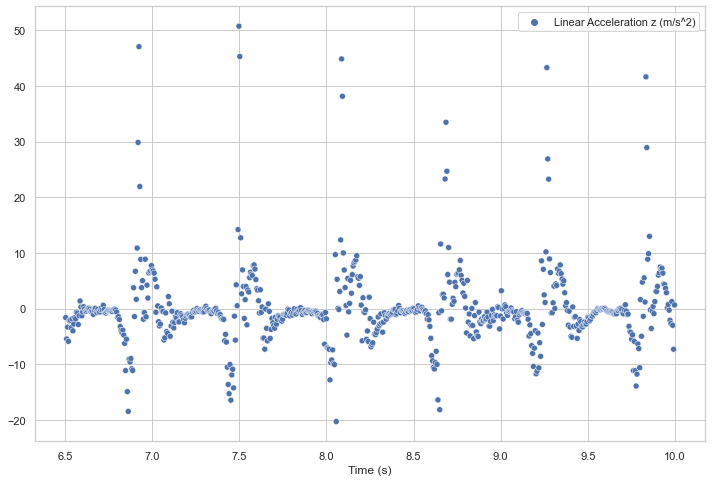

In [10]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.scatterplot(ax=ax1,data=df_1)

In [11]:
initial_v_value=0
v_0={'v':[initial_v_value]}
v=pd.DataFrame(data=v_0)


In [12]:
df_1.iloc[0][0]

-1.591324806

t=(last data point - first data point)/254(rows)

In [13]:
t=0.00510394

In [14]:
for i in range(1,len(df_1)):
    v_value=((t/2)*((df_1.iloc[i-1][0])+(df_1.iloc[i][0]))+v.iloc[i-1])
    v=v.append(v_value,ignore_index=True)
    

In [15]:
v

,v
0,0.000000
1,-0.017916
2,-0.040210
3,-0.063592
4,-0.083970
...,...
678,-0.061714
679,-0.065282
680,-0.069622
681,-0.095785


<AxesSubplot:>

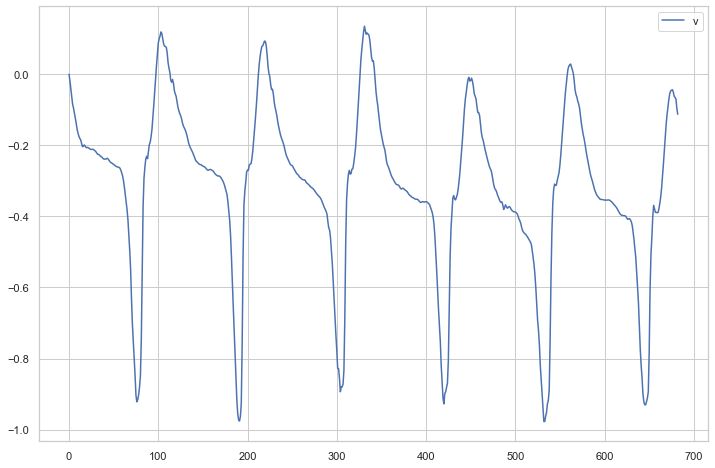

In [16]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax1,data=v)

In [17]:
initial_s_value=0
s_0={'s':[initial_s_value]}
s=pd.DataFrame(data=s_0)

In [18]:
for i in range(1,len(df_1)):
    s_value=((t/2)*((v.iloc[i-1][0])+(v.iloc[i][0]))+s.iloc[i-1])
    s=s.append(s_value,ignore_index=True)

<AxesSubplot:>

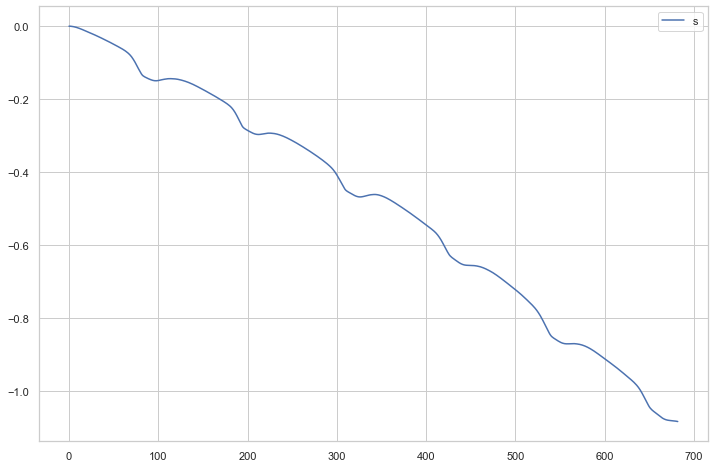

In [19]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax1,data=s)

In [20]:
combined_plot=v
combined_plot['s']=s.iloc[:]
combined_plot['v']

0      0.000000
1     -0.017916
2     -0.040210
3     -0.063592
4     -0.083970
         ...   
678   -0.061714
679   -0.065282
680   -0.069622
681   -0.095785
682   -0.112637
Name: v, Length: 683, dtype: float64

Text(0.5, 1.0, 'Displacement (Double integration)')

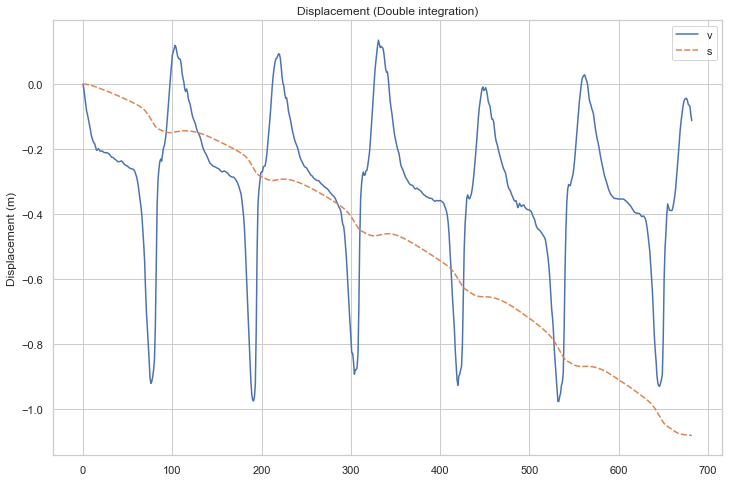

In [21]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set(ylabel="Displacement (m)")
sns.lineplot(ax=ax1,data=combined_plot).set_title('Displacement (Double integration)')